In [2]:
import numpy as np
import pandas as pd

#reading the data
data = pd.read_csv('data.csv',index_col = 0 )

#sort the df by ascending years and descending hapiness scores
data.sort_values(['Year','Happiness Score'],ascending=[True,False],inplace=True)

#display first 10 rows
data.head(10)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
141,Switzerland,Western Europe,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
60,Iceland,Western Europe,2.0,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
38,Denmark,Western Europe,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
108,Norway,Western Europe,4.0,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
25,Canada,North America,5.0,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
46,Finland,Western Europe,6.0,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955,2015
102,Netherlands,Western Europe,7.0,7.378,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570,2015
140,Sweden,Western Europe,8.0,7.364,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119,2015
103,New Zealand,Australia and New Zealand,9.0,7.286,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425,2015
6,Australia,Australia and New Zealand,10.0,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646,2015


In [6]:
#getting an overview of our data
print("Our data has {0} rows and {1} columns".format(data.shape[0],data.shape[1]))

# checking for missing values
print("Are there any missing values? {}".format(data.isnull().any().any()))
data.describe()

Our data has 495 rows and 12 columns
Are there any missing values? True


,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,495.000000
mean,78.829787,5.370728,0.927830,0.990347,0.579968,0.402828,0.134790,0.242241,2.092717,2016.000000
std,45.281408,1.136998,0.415584,0.318707,0.240161,0.150356,0.111313,0.131543,0.565772,0.817323
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2015.000000
25%,40.000000,4.509000,0.605292,0.793000,0.402301,0.297615,0.059777,0.152831,1.737975,2015.000000
50%,79.000000,5.282500,0.995439,1.025665,0.630053,0.418347,0.099502,0.223140,2.094640,2016.000000
75%,118.000000,6.233750,1.252443,1.228745,0.768298,0.516850,0.173161,0.315824,2.455575,2017.000000
max,158.000000,7.587000,1.870766,1.610574,1.025250,0.669730,0.551910,0.838075,3.837720,2017.000000


In [9]:
#let's group our data 
data_by_year = pd.pivot_table(data,index = "Year",values = "Happiness Score")
data_by_region = pd.pivot_table(data,index = "Region",values = "Happiness Score")
region_and_year = pd.pivot_table(data,index = ["Region","Year"],values = "Happiness Score")
print(data_by_year)
print(data_by_region)
print(region_and_year)


      Happiness Score
Year                 
2015         5.375734
2016         5.382185
2017         5.354019
                                 Happiness Score
Region                                          
Australia and New Zealand               7.302500
Central and Eastern Europe              5.371184
Eastern Asia                            5.632333
Latin America and Caribbean             6.069074
Middle East and Northern Africa         5.387879
North America                           7.227167
Southeastern Asia                       5.364077
Southern Asia                           4.590857
Sub-Saharan Africa                      4.150957
Western Europe                          6.693000
                                      Happiness Score
Region                          Year                 
Australia and New Zealand       2015         7.285000
                                2016         7.323500
                                2017         7.299000
Central and Eastern Europe      

In [10]:
pd.pivot_table(data, index = "Region" ,columns = 'Year',values ="Happiness Score")

Year,2015,2016,2017
Region,,,
Australia and New Zealand,7.285000,7.323500,7.299000
Central and Eastern Europe,5.332931,5.370690,5.409931
Eastern Asia,5.626167,5.624167,5.646667
Latin America and Caribbean,6.144682,6.101750,5.957818
Middle East and Northern Africa,5.406900,5.386053,5.369684
North America,7.273000,7.254000,7.154500
Southeastern Asia,5.317444,5.338889,5.444875
Southern Asia,4.580857,4.563286,4.628429
Sub-Saharan Africa,4.202800,4.136421,4.111949


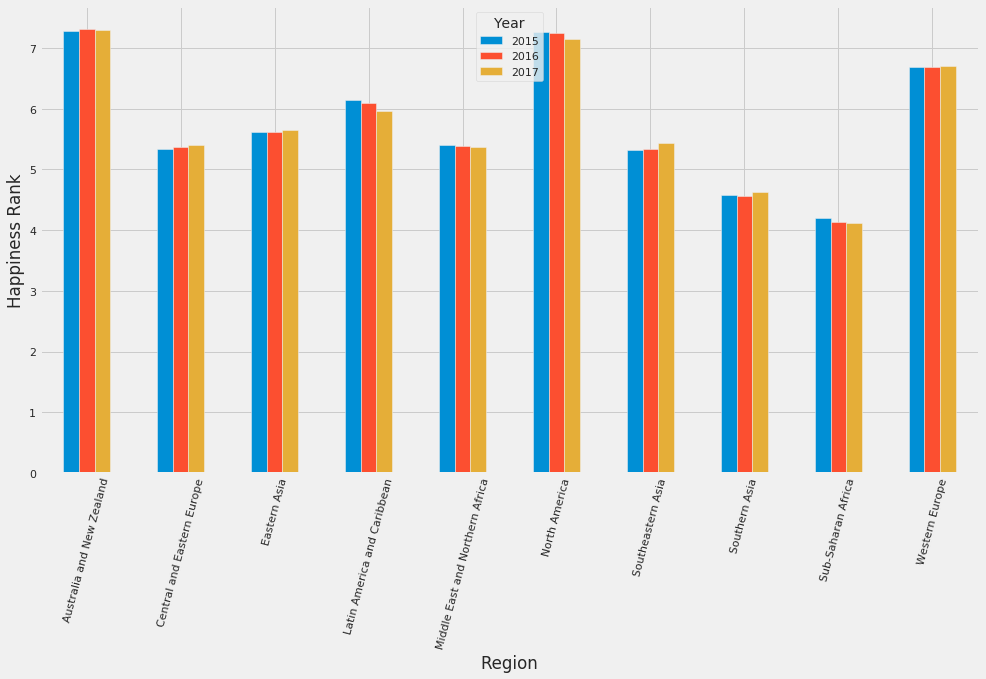

In [20]:
#visualising the data
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import warnings
warnings.filterwarnings('ignore')

style.use('fivethirtyeight')

pd.pivot_table(data, index = "Region" ,columns = 'Year',values ="Happiness Score").plot(kind = 'bar',figsize=(15,8))
plt.ylabel('Happiness Rank')
plt.xticks(rotation=75)
plt.show()

In [22]:
pd.pivot_table(data, index = "Region" ,values ="Happiness Score",aggfunc=[np.mean,np.median,min,max,np.std])

,mean,median,min,max,std
,Happiness Score,Happiness Score,Happiness Score,Happiness Score,Happiness Score
Region,,,,,
Australia and New Zealand,7.302500,7.2995,7.284,7.334,0.020936
Central and Eastern Europe,5.371184,5.4010,4.096,6.609,0.578274
Eastern Asia,5.632333,5.6545,4.874,6.422,0.502100
Latin America and Caribbean,6.069074,6.1265,3.603,7.226,0.728157
Middle East and Northern Africa,5.387879,5.3175,3.006,7.278,1.031656
North America,7.227167,7.2175,6.993,7.427,0.179331
Southeastern Asia,5.364077,5.2965,3.819,6.798,0.882637
Southern Asia,4.590857,4.6080,3.360,5.269,0.535978


In [26]:
#using the lambda function to remove outliers to see if ranking changes significantly
def remove_outliers(values):
    mid_quantiles = values.quantile([.25, .75])
    return np.mean(mid_quantiles)

pd.pivot_table(data, index = 'Region',values = "Happiness Score", aggfunc = [np.mean,remove_outliers, lambda x: x.count()/3])

,mean,remove_outliers,<lambda>
,Happiness Score,Happiness Score,Happiness Score
Region,,,
Australia and New Zealand,7.302500,7.299125,2.000000
Central and Eastern Europe,5.371184,5.449250,29.000000
Eastern Asia,5.632333,5.610125,6.000000
Latin America and Caribbean,6.069074,6.192750,22.666667
Middle East and Northern Africa,5.387879,5.508500,19.333333
North America,7.227167,7.244875,2.000000
Southeastern Asia,5.364077,5.470125,8.666667
Southern Asia,4.590857,4.707500,7.000000


In [30]:
#categorising using strings
table = pd.pivot_table(data, index = 'Region',values = "Happiness Score", aggfunc = [np.mean,remove_outliers])
print(table[table.index.str.contains('Asia')],'\n')
print(table[table.index.str.contains('Europe')])

                             mean remove_outliers
                  Happiness Score Happiness Score
Region                                           
Eastern Asia             5.632333        5.610125
Southeastern Asia        5.364077        5.470125
Southern Asia            4.590857        4.707500 

                                      mean remove_outliers
                           Happiness Score Happiness Score
Region                                                    
Central and Eastern Europe        5.371184         5.44925
Western Europe                    6.693000         6.84650


In [32]:
# using df.query to select specific years from the Africa region
table = pd.pivot_table(data, index = ['Region','Year'],values = "Happiness Score", aggfunc = [np.mean,remove_outliers])
table.query('Year == [2015,2017] and Region == ["Sub-Saharan Africa","Middle East and Northern Africa"]')

mean remove_outliers
                                     Happiness Score Happiness Score
Region                          Year                                
Middle East and Northern Africa 2015        5.406900        5.515875
                                2017        5.369684        5.425500
Sub-Saharan Africa              2015        4.202800        4.168375
                                2017        4.111949        4.118000

In [42]:
#splitting the happiness score into 3 quantiles
score = pd.qcut(data["Happiness Score"], 4)
pd.pivot_table(data, index = ['Region', score], values = "Happiness Score", aggfunc= 'count').head(10)

Happiness Score
Region                      Happiness Score                 
Australia and New Zealand   (6.234, 7.587]               6.0
Central and Eastern Europe  (2.692, 4.509]              10.0
                            (4.509, 5.283]              28.0
                            (5.283, 6.234]              46.0
                            (6.234, 7.587]               3.0
Eastern Asia                (4.509, 5.283]               6.0
                            (5.283, 6.234]               9.0
                            (6.234, 7.587]               3.0
Latin America and Caribbean (2.692, 4.509]               2.0
                            (4.509, 5.283]               8.0

In [39]:
#splitting the happiness score into 3 quantiles
score = pd.qcut(data["Happiness Score"], 3)
pd.pivot_table(data, index = ['Region', score], values = "Happiness Score", aggfunc= 'count', fill_value = 0)

Happiness Score
Region                          Happiness Score                 
Australia and New Zealand       (5.895, 7.587]                 6
Central and Eastern Europe      (2.692, 4.79]                 15
                                (4.79, 5.895]                 58
                                (5.895, 7.587]                14
Eastern Asia                    (4.79, 5.895]                 11
                                (5.895, 7.587]                 7
Latin America and Caribbean     (2.692, 4.79]                  4
                                (4.79, 5.895]                 19
                                (5.895, 7.587]                45
Middle East and Northern Africa (2.692, 4.79]                 18
                                (4.79, 5.895]                 20
                                (5.895, 7.587]                20
North America                   (5.895, 7.587]                 6
Southeastern Asia               (2.692, 4.79]                  6
                                (4.79, 5.895]                 12
                                (5.895, 7.587]                 8
Southern Asia                   (2.692, 4.79]                 13
                                (4.79, 5.895]                  8
Sub-Saharan Africa              (2.692, 4.79]                101
                                (4.79, 5.895]                 16
Western Europe                  (4.79, 5.895]                 12
                                (5.895, 7.587]                51

In [49]:
import pandas as pd

In [50]:
x = pd.read_csv('health.csv')

In [51]:
x.head()

,CASEID,QUESTID2,CIGEVER,CIGOFRSM,CIGWILYR,CIGTRY,CIGYFU,CIGMFU,CIGREC,CIG30USE,...,AMBIEN,COLDMEDS,KETAMINE,TRYPTMN,SALVDIV,GHBREC,ADDEREC,AMBIREC,COLDREC,COLDYR1
0,1,85314767,1,99,99,16,9999,99,4,93,...,2,2,2,2,2,91,91,91,91,9991.0
1,2,16240983,1,99,99,16,9999,99,1,1,...,2,2,2,2,2,91,91,91,91,9991.0
2,3,95206287,2,99,99,991,9991,91,91,91,...,2,2,2,2,2,91,91,91,91,9991.0
3,4,91546127,2,99,99,991,9991,91,91,91,...,2,2,2,2,2,91,91,91,91,9991.0
4,5,43902390,2,99,99,991,9991,91,91,91,...,2,2,2,2,2,91,91,91,91,9991.0


In [52]:
x.shape

(55271, 1024)